In [71]:
from mpl_toolkits import mplot3d
import numpy as np
import random 
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
%matplotlib inline 
#%matplotlib notebook

Random walk is basically a simulation process in which movement of some object is determined probabilistically. For a simplistic model, we will look at the diffusion along one dimension (X-axis). However, we can extend this same logic for all dimensions. Here, diffusion depends on Brownian motion, which can be described as a random walk. This is how we can think of random walk as: You can think of a one-dimensional random walk in terms of coin flipping. Suppose you are standing on a very long straight sidewalk that extends both in front of and behind you. You flip a coin. If it comes up heads, you take a step forward; tails means to take a step backward.

Consider first a random walk in one dimension. Imagine a ‘walker’ (a particle) that takes one step during each unit time interval. Each step is one unit long, but the step direction is randomly chosen to be either ‘forward’ in the +x or ‘backward’ in the −x direction. In the codes written below, I have assigned the different conditions for this movement. Please check the condition for each one, and comment which condition I have assigned for each type of motion. For example, in the first code, I have subtracted 1 from the previous position of the particle, if the probability (which I genereated from the random numner) is less than 0.5. And added 1 from the previous position, if the probability os greated than 0.5. Again, these probabilities are not deterministic, as they are being generated randomly. So, the motion in one direction has no influence whatsover for the motion in one direction.

In [2]:

stepsize = 1
numsteps = 100
position = [0]
x = 0
for i in range(numsteps):
    number = np.random.rand()
    if number < 0.5:
        x = x - stepsize
    else:
        x = x + stepsize
    position.append(x)

In [3]:
print(position)

[0, -1, -2, -1, 0, 1, 2, 3, 2, 3, 4, 5, 6, 7, 6, 5, 4, 3, 4, 3, 4, 3, 2, 3, 2, 3, 4, 3, 4, 5, 4, 5, 6, 7, 6, 5, 6, 7, 6, 5, 4, 3, 2, 1, 2, 3, 2, 1, 2, 1, 2, 3, 4, 5, 6, 7, 8, 9, 8, 7, 6, 5, 6, 5, 4, 5, 6, 5, 6, 5, 6, 7, 6, 7, 8, 9, 10, 11, 10, 11, 10, 11, 10, 11, 12, 13, 12, 11, 10, 11, 12, 13, 14, 13, 12, 13, 12, 13, 14, 13, 12]


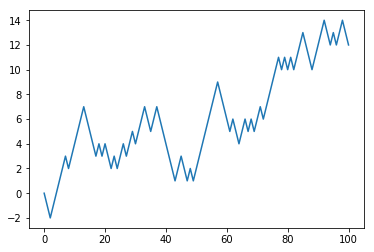

In [4]:
plt.plot(position)

In [5]:
                     
ns = 100                        # no of steps
positions = [0]     # all particles start at x=0
HEAD = 0;  TAIL = 1         # constants

for step in range(ns):
        coin = random.randint(0,1)  # flip coin
        if coin == HEAD:
            positions.append(positions[-1]+1)  # one unit length to the right
        elif coin == TAIL:
            positions.append(positions[-1]-1)   # one unit length to the left

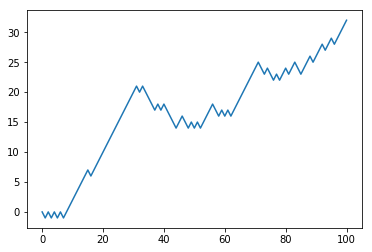

In [6]:
plt.plot(positions)

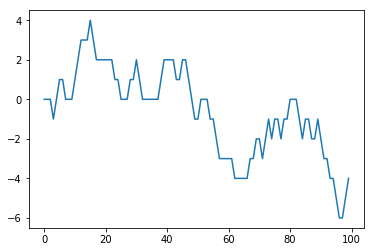

In [7]:

stepsize = 1.0
numsteps = 100
position = np.zeros(numsteps)
x = 0.0
for i in range(numsteps):
    if np.random.rand() > 0.5:
        x = x + stepsize
    if np.random.rand() <= 0.5: #here we're taking random integer again that is independent; 
                                 #we need same one otherwise both or none of the conditions may be true
        x = x - stepsize
    position[i] = x
plt.plot(position)

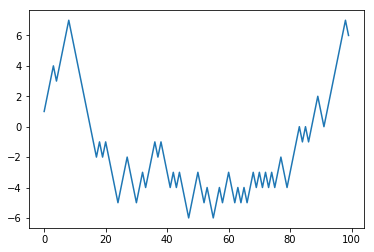

In [8]:
#Corrected
stepsize = 1.0
numsteps = 100
position = np.zeros(numsteps)
x = 0.0
for i in range(numsteps):
    toss = np.random.rand()
    if toss > 0.5:
        x = x + stepsize
    if toss <= 0.5:
        x = x - stepsize
    position[i] = x
plt.plot(position)

# Task 1

In [9]:
HEAD = 1
TAIL = 2



ns = 1000 # no of steps
a = np.zeros(1000)
b = a.transpose()
                        

for step in range(ns):
    for _ in range(ns):
        coin_x = random.randint(1,2)

        # Move on x axis
        if coin_x == HEAD:
           b[step]+=1  
        elif coin_x == TAIL:
           b[step]-=1   

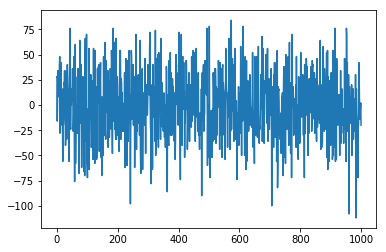

In [10]:
plt.plot(b)
#print(b)

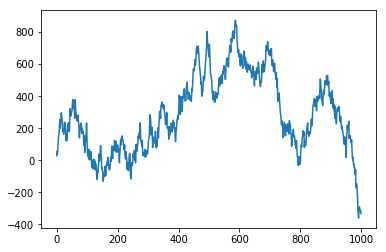

In [11]:
plt.plot(np.cumsum(b))

In [12]:
#help(np.cumsum)

### Q. Why the above two plots are different? What does each plot signifies, and which one of them gives you the correct plot for the position of the particle after n steps?

In the first plot, the walker has walked 1000 unit steps 1000 times and it shows the plots of end resuts of each. The 1000 times the walker walked are independent of one another and the end results are stored in separate indices of the array 'b'. So it is the plot of 1000 independent 1-D random walks, with each initial position starting at x=0, and each random walk has 1000 unit steps.

In the second plot, we have plotted a cumulative sum of the results after each 1000 steps i.e. the $1000 \times 1000$ steps happen one after another and result after each 1000 walks are plotted 1000 times. So, it is like one single random walk of $1000 \times 1000$ steps, and the result after each 1000 walks is plotted.

In [13]:

N = 1000                   # number of steps
d = 1                      # step length
x = np.zeros(N+1)          # x coordinates 
        
#x[0] = 0        # set initial position

for i in range(0, N):
    r = random.random()         # random number in [0,1)
    if r < 0.5:          
        x[i+1] = x[i] + d
    else:
        x[i+1] = x[i] - d

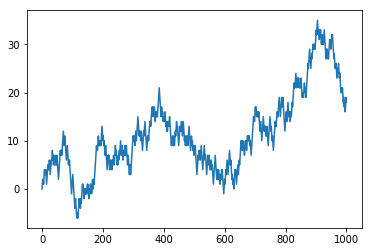

In [14]:
plt.plot(x)

### Q. Can you extend the above code for 1D motion for either 2D as well as 3D motion?  

### 2D random walk; continuous random variables $\Delta X,\Delta Y \epsilon [0,1]$ and in polar $\Delta r =1 , \theta \epsilon [0,2\pi]$

In [15]:
N = 100                    # number of steps
r = 1                      # step length
x = np.zeros(N+1)          # x coordinates 
y = np.zeros(N+1)          # y coordinates 
        
for i in range(1, N+1):
    theta = random.uniform(0, 2*np.pi)        # angle theta as a random number in [0,2*pi)
    x[i]=x[i-1]+r*np.cos(theta)
    y[i]=y[i-1]+r*np.sin(theta)

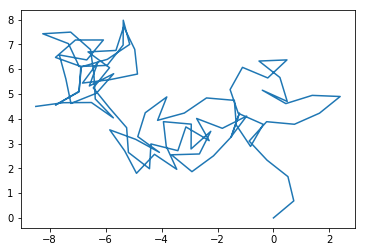

In [16]:
plt.plot(x,y)

### 2D random walk (method 2), Discrete random variables $\Delta X,\Delta Y\epsilon \{-1,1\}$ and in polar $\Delta r =1 , \theta \epsilon \{0,\frac{\pi}{2}, \pi, \frac{-\pi}{2}\}$

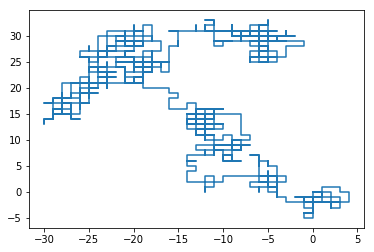

In [17]:
N = 1000                   # number of steps
d = 1                      # step length
X = []        # x coordinates 
Y = []        # y coordinates 
        
X.append(0)        # set initial position
Y.append(0) 

x=0
y=0

for i in range(0, N):
    r = random.randint(0,3)         # random number
    if r == 0:  # theta=0; new (x,y), from (0,0), =(1,0)
        x=x+d
        
    elif r == 1: # theta=180; new (x,y), from (0,0), =(-1,0)
        x=x-d
        
    elif r == 2: # theta=90; new (x,y), from (0,0), =(0,1)
        y=y+d
        
    else: # theta=-90; new (x,y), from (0,0), =(0,-1)
        y=y-d
    X.append(x)
    Y.append(y)
plt.plot(X,Y)

### 3D random walk; continuous random variables $\Delta X,\Delta Y,\Delta Z \epsilon [0,1]$ and in polar $\Delta r =1 , \theta \epsilon [0,\pi], \phi \epsilon [0,2\pi],$

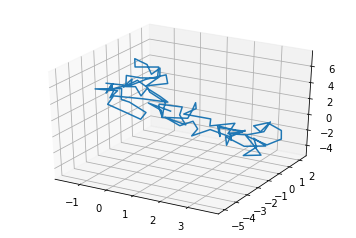

In [18]:

fig = plt.figure()
ax = plt.axes(projection='3d')


N = 100                    # number of steps
r = 1                      # step length
x = np.zeros(N+1)          # x coordinates 
y = np.zeros(N+1)          # y coordinates 
z = np.zeros(N+1)          # z coordinates 

for i in range(1, N+1):
    theta = random.uniform(0, np.pi)        # angle theta as a random number in [0,pi)
    phi = random.uniform(0, 2*np.pi)        # angle phi as a random number in [0,2*pi)
    x[i]=x[i-1]+r*np.sin(theta)*np.cos(phi)
    y[i]=y[i-1]+r*np.sin(theta)*np.sin(phi)
    z[i]=z[i-1]+r*np.cos(theta)
    
ax.plot3D(x, y, z)

### 3D random walk (method 2), Discrete random variables $\Delta X,\Delta Y,\Delta Z\epsilon \{-1,1\}$

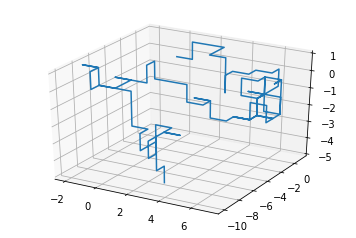

In [19]:
N = 100                # number of steps
d = 1                      # step length
X = []        # x coordinates 
Y = []        # y coordinates 
Z = []        # y coordinates 
        
X.append(0)        # set initial position
Y.append(0) 
Z.append(0)

x=0
y=0
z=0

for i in range(0, N):
    r = random.randint(0,5)         # random number
    if r == 0:  
        x=x+d
        
    elif r == 1:
        x=x-d
        
    elif r == 2:    
        y=y+d
        
    elif r==3:
        y=y-d
        
    elif r==4:
        z=z+d
    else:
        z=z-d
        
    X.append(x)
    Y.append(y)
    Z.append(z)
    
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(X, Y, Z)

### Q. Can you show that the average distance travelled in a single step (remember, single step) is zero?  

Random variable; $\Delta X\in \{-1,1\}$

Equi-probable walk => Probabilities; $P(\Delta X=-1)=P(\Delta X=1)=\frac{1}{2}$

Now, average distance travelled in a single step $$E (\Delta X)=\sum \Delta XP(\Delta X)=-1\times\frac{1}{2}+1\times\frac{1}{2}=0$$


### Q. Finally, can you show that mean distance travelled is zero?  

After N steps,

Mean distance travelled $$E(\Delta X_N)=N\times E(\Delta X)=N\times0=0$$

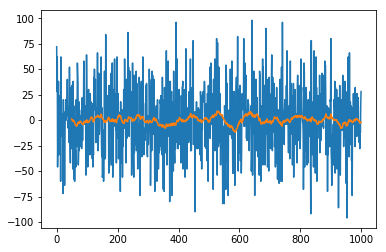

In [20]:
#@title
# Q. Can you show that the average distance travelled in a single step (remember, single step) is zero?
HEAD = 1
TAIL = 2



ns = 1000 # no of steps
a = np.zeros(1000)
b = a.transpose()
                        

for step in range(ns):
    for _ in range(ns):
        coin_x = random.randint(1,2)

        # Move on x axis
        if coin_x == HEAD:
           b[step]+=1  
        elif coin_x == TAIL:
           b[step]-=1   

import pandas as pd
plt.plot(b)
df = pd.DataFrame(b)
plt.plot(df.rolling(window = 50).mean()) 

### Q. Check the validity of uniform random generator

In [21]:
N = 1000 
T=[]
for i in range(0, N):
    theta = random.uniform(0, 2*np.pi) 
    T.append(theta)
#print(T)

In [22]:

x=0
y=0
for i in range(0,len(T)):
    if T[i]>=np.pi:
        x=x+1
    else:
        y=y+1
print(r'Emperical Probability of getting theta in range (pi ,2pi)=', x/1000)
print('Emperical Probability of getting theta in range (0,pi)=', y/1000)
print(r'Total Emperical Probability of getting theta in range (0,2pi)=', (x+y)/1000)

Emperical Probability of getting theta in range (pi ,2pi)= 0.538
Emperical Probability of getting theta in range (0,pi)= 0.462
Total Emperical Probability of getting theta in range (0,2pi)= 1.0


### SImplest way for 1D random walk

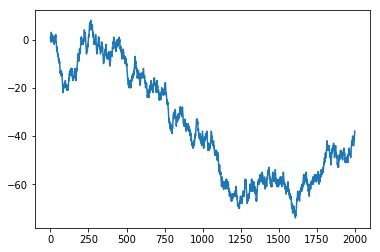

In [23]:
numsteps = 2000
times = range(numsteps)
steps = np.random.random(numsteps) # gives array of float random numbers in range [0,1) of size 'numsteps'
steps[steps>0.5] = 1
steps[steps<=0.5] = -1
trajs = np.cumsum(steps)
plt.plot(trajs)

### Alternately

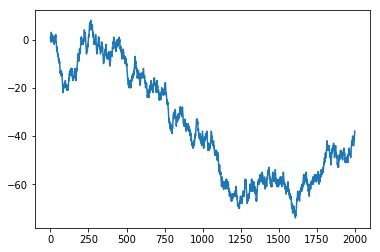

In [24]:

for i in range(numsteps):
    if steps[i]>0.5:
        steps[i]=1
    elif steps[i]<=0.5:
        steps[i]=-1
#steps[steps>0.5] = 1
#steps[steps<=0.5] = -1
trajs = np.cumsum(steps)
plt.plot(trajs)

In [25]:
#help(np.random.random)


### Sir's method (method 1) for 2D random walk: 
Here the 2D and 3D points donot have a step size of 1 as X,Y coordinates can change simultaneously. So, step size $= \sqrt{2}$ in 2D and $= \sqrt{3}$ in 3D

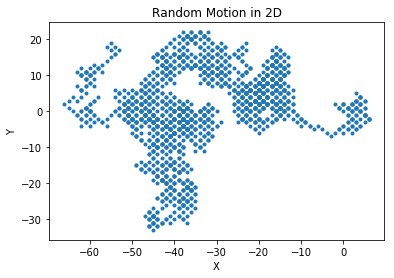

In [26]:
numsteps = 2000
times = range(numsteps)
steps = np.random.random((numsteps,2))
steps[steps>0.5] = 1
steps[steps<=0.5] = -1
x, y = np.cumsum(steps, axis = 0)[:,0],np.cumsum(steps, axis = 0)[:,1]
plt.plot(x,y, linestyle = '', marker = '.')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Random Motion in 2D');

## 2D :
### Method 1 :
In the code above, both x and y co-ordinates are changing randomly but simultaneously. We are having two tosses each for X and Y coordinates simultaneously to choose +1 or -1. This means, the step size(d) of the random walk is not 1 but  $\sqrt{2}$. Here's the reason:

assuming starting point =(0,0) in the X-Y plane for 2D motion;

X changes into either 1 or -1 and Y changes into 1 or -1. 

So, the possible next points are: (1,1), (1,-1), (-1,1), or (-1,-1). 

The distances from (0,0) to any of these next points is $\sqrt{2}$. So, this random walk assumes motion only in diagonal directions or cross directions i.e 45 degree directions, of step size $\sqrt{2}$.

### Method 2 :
But in the previous 2D assignment, choice between X and Y axis ie simultaneous changes in both x and y coordinates not allowed. The code chooses either X or Y axis in either positive or negative direction. So, it assumes motion in plus directions only or only along (positive or negative) X or Y axes so along 90 degree lines, and each step is a unit step as the next possible points are (0,1), (0,-1), (1,0), or (-1,0) i.e, step size, d=1. 

One toss to choose between X or Y and another to choose +1 or -1.

### Comparision :
Since both methods have 2 tosses and 4 possible outcomes, technically both are equivalent, just have different events: in the first, two tosses (one for X coordinate; possible outcomes= {1,-1} and the other for Y coordinate; possible outcomes= {1,-1}) simultaneously ie at the same instant, and in the second method, we have two simultaneous tosses (one to choose coordinates; possible outcomes= {X,Y} and the other to choose values; possible outcomes= {1,-1}), thus resulting in different possible events [ E1= {1,-1}$\times${1,-1}={(1,1),(1,-1),(-1,1),(-1,-1)}, with cardinality=2$\times$2= 4, and E2= {X,Y}$\times${1,-1}={(X,1),(X,-1),(Y,1),(Y,-1)}, with cardinality=2$\times$2= 4], which results in different step sizes and different directions. The probability of getting any one outcome= $\frac{1}{4}$ in both methods.

![image info](./images/image1.png)


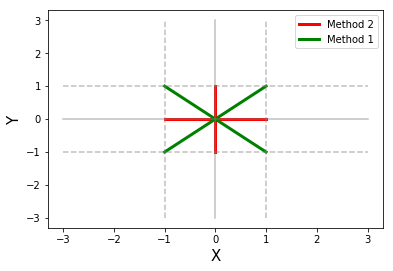

In [27]:
x1=[0,1]
y1=[0,0]
plt.plot(x1,y1,lw=3,color='r',label='Method 2')
x1=[0,-1]
y1=[0,0]
plt.plot(x1,y1,lw=3,color='r')
x1=[0,0]
y1=[0,1]
plt.plot(x1,y1,lw=3,color='r')
x1=[0,0]
y1=[0,-1]
plt.plot(x1,y1,lw=3,color='r')

x1=[0,1]
y1=[0,1]
plt.plot(x1,y1,lw=3,color='g',label='Method 1')
x1=[0,1]
y1=[0,-1]
plt.plot(x1,y1,lw=3,color='g')
x1=[0,-1]
y1=[0,1]
plt.plot(x1,y1,lw=3,color='g')
x1=[0,-1]
y1=[0,-1]
plt.plot(x1,y1,lw=3,color='g')

plt.plot([0,0],[-3,3],color='grey',alpha=0.5)
plt.plot([-3,3],[0,0],color='grey',alpha=0.5)

plt.plot([1,1],[-3,3],'--',color='grey',alpha=0.5)
plt.plot([-3,3],[1,1],'--',color='grey',alpha=0.5)
plt.plot([-1,-1],[-3,3],'--',color='grey',alpha=0.5)
plt.plot([-3,3],[-1,-1],'--',color='grey',alpha=0.5)
plt.xlabel('X', fontsize= 15)
plt.ylabel('Y', fontsize= 15)
plt.legend()
plt.savefig('./images/image1.png')
plt.show()


### Sir's method (method 1) for 3D random walk: 
Here the 2D and 3D points donot have a step size of 1 as X,Y coordinates can change simultaneously. So, step size $= \sqrt{2}$ in 2D and $= \sqrt{3}$ in 3D

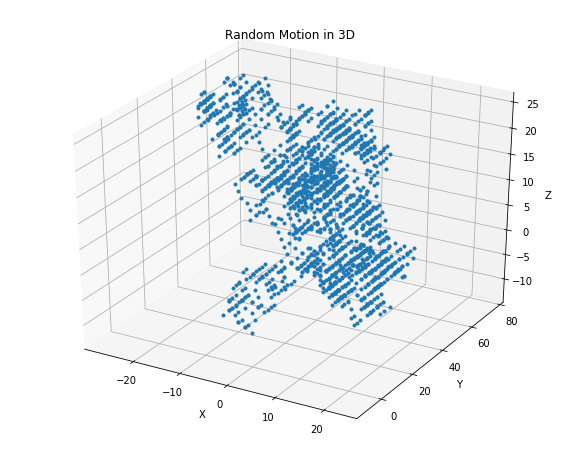

In [28]:
numsteps = 2000
times = range(numsteps)
steps = np.random.random((numsteps,3))
steps[steps>0.5] = 1
steps[steps<=0.5] = -1
x, y, z = np.cumsum(steps, axis = 0)[:,0],np.cumsum(steps, axis = 0)[:,1], np.cumsum(steps, axis = 0)[:,2]
fig_3d = plt.figure(figsize = (10,8))
fig_3d.add_subplot(1,1,1,projection="3d")
ax = plt.gca()
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.plot(x,y,z, linestyle = '', marker = '.')
plt.title('Random Motion in 3D');
plt.show()

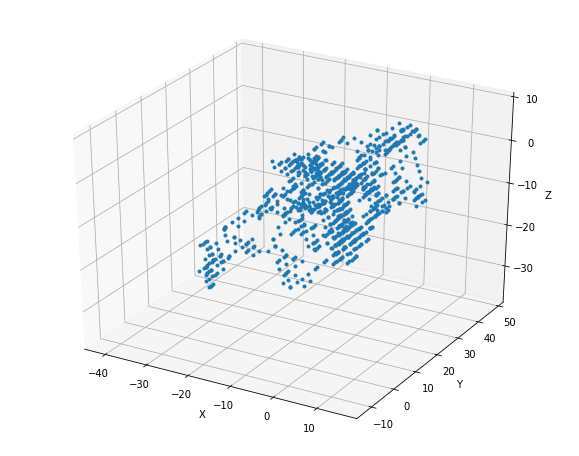

In [59]:
HEAD = 1
TAIL = 2



a = np.zeros((3, 1000))
b = a.transpose()
ns = 1000                       # no of steps

for step in range(ns):
        coin_x = random.randint(1,2)

        # Move on x axis
        if coin_x == HEAD:
           b[step,0]+=1  
        elif coin_x == TAIL:
           b[step,0]-=1   

        # Move on y axis
        coin_y = random.randint(1,2)
        if coin_y == HEAD:
           b[step,1]+=1 
        elif coin_y == TAIL:
           b[step,1]-=1  
        
        #move on z axis
        coin_z = random.randint(1,2)
        if coin_z == HEAD:
           b[step,2]+=1 
        elif coin_z == TAIL:
           b[step,2]-=1 
%matplotlib inline
fig_3d = plt.figure(figsize = (10,8))
fig_3d.add_subplot(1,1,1,projection="3d")
ax = plt.gca()
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.plot(b[:,0].cumsum(),b[:,1].cumsum(),b[:,2].cumsum(), linestyle = '', marker = '.')
plt.show()

## 3D:

In 3D case, in the first method, three tosses (one for X coordinate; possible outcomes= {1,-1}, other for Y coordinate; possible outcomes= {1,-1} and last one for Z coordinate; possible outcomes= {1,-1}) simultaneously ie at the same instant, and in the second method, we have two simultaneous tosses (one to choose coordinates; possible outcomes= {X,Y,Z} and the other to choose values; possible outcomes= {1,-1}), thus resulting in different possible events[ E1= {1,-1}$\times${1,-1}$\times${1,-1}={(1,1,1),(1,-1,1),(-1,1,1),(-1,-1,1),(1,1,-1),(1,-1,-1),(-1,1,-1),(-1,-1,-1)}, with cardinality=2$\times$2$\times$2= 8, and E2= {X,Y,Z}$\times${1,-1}={(X,1),(X,-1),(Y,1),(Y,-1),(Z,1),(Z,-1)}, with cardinality=3$\times$2= 6], which results in different step sizes and different directions. The probability of getting any one outcome in the first method= $\frac{1}{8}$ and in the second method= $\frac{1}{6}$. The step size in first method is $\sqrt{3}$ but in the second method, it is 1.


## n-D:


Thus, in n-dimensions, the cardinality of the sample space of first method n(E1)=$2^n$ i.e. probability of getting one event= $\frac{1}{2^n}$ and the cardinality of the sample space of the second method n(E2)=$2n$ i.e. probability of getting one event= $\frac{1}{2n}$. Since the first method has greater cardinality ($2^n$>$2n$; $\forall$ n < 1 and n > 2; same for n=1 and n=2 i.e. 1-D and 2-D motions) for 3-D and higher dimensions i.e. more possible outcomes, the random walk obtained has more mobility and the second random walk's particle has more restricted motion with less possibilities. The step size in the second random walk i.e. Euclidean distance from (0,0,0,...,0) to (0,1,0,...,0) [any one coordinate = 1 or -1] is always 1 and the step size in the first random walk i.e. Euclidean distance from (0,0,0,...,0) to (1,1,1,...,1) [all coordinates = 1 or -1] is $\sqrt{n}$ for n-dimensions.

In [29]:


def plot_func1(elev, azim):
    fig_3d = plt.figure(figsize = (10,8))
    fig_3d.add_subplot(1,1,1,projection="3d")
    ax = plt.gca()
    ax.set_xlabel('X', fontsize= 15)
    ax.set_ylabel('Y', fontsize= 15)
    ax.set_zlabel('Z', fontsize= 15)
    ax.view_init(elev, azim)
    z1=[0,0]
    x1=[0,1]
    y1=[0,0]
    ax.plot(x1,y1,z1, lw=3,color='r',label='Method 2')
    x1=[0,-1]
    y1=[0,0]
    ax.plot(x1,y1,z1,lw=3,color='r')
    x1=[0,0]
    y1=[0,1]
    ax.plot(x1,y1,z1,lw=3,color='r')
    x1=[0,0]
    y1=[0,-1]
    ax.plot(x1,y1,z1,lw=3,color='r')
    z1=[0,1]
    x1=[0,0]
    y1=[0,0]
    ax.plot(x1,y1,z1, lw=3,color='r')
    x1=[0,0]
    y1=[0,0]
    z1=[0,-1]
    ax.plot(x1,y1,z1,lw=3,color='r')

    x1=[0,1]
    y1=[0,1]
    z1=[0,1]
    ax.plot(x1,y1,z1,lw=3,color='g',label='Method 1')
    x1=[0,1]
    y1=[0,-1]
    ax.plot(x1,y1,z1,lw=3,color='g')
    x1=[0,-1]
    y1=[0,1]
    ax.plot(x1,y1,z1,lw=3,color='g')
    x1=[0,-1]
    y1=[0,-1]
    ax.plot(x1,y1,z1,lw=3,color='g')
    x1=[0,1]
    y1=[0,1]
    z1=[0,-1]
    ax.plot(x1,y1,z1,lw=3,color='g')
    x1=[0,1]
    y1=[0,-1]
    ax.plot(x1,y1,z1,lw=3,color='g')
    x1=[0,-1]
    y1=[0,1]
    ax.plot(x1,y1,z1,lw=3,color='g')
    x1=[0,-1]
    y1=[0,-1]
    ax.plot(x1,y1,z1,lw=3,color='g')




    #ax.plot(x,y,z)
    ax.plot([0,0],[-3,3],[0,0],color='grey',alpha=0.5)
    ax.plot([-3,3],[0,0],[0,0],color='grey',alpha=0.5)
    ax.plot([0,0],[0,0],[-3,3],color='grey',alpha=0.5)
    
    
    plt.plot([1,1],[1,1],[-3,3],'--',color='grey',alpha=0.5)
    plt.plot([-3,3],[1,1],[1,1],'--',color='grey',alpha=0.5)
    plt.plot([1,1],[-3,3],[1,1],'--',color='grey',alpha=0.5)
    plt.plot([-1,-1],[-1,-1],[-3,3],'--',color='grey',alpha=0.5)
    plt.plot([-3,3],[-1,-1],[-1,-1],'--',color='grey',alpha=0.5)
    plt.plot([-1,-1],[-3,3],[-1,-1],'--',color='grey',alpha=0.5)
    
    plt.plot([1,1],[-1,-1],[-3,3],'--',color='grey',alpha=0.5)
    plt.plot([-3,3],[1,1],[-1,-1],'--',color='grey',alpha=0.5)
    plt.plot([-1,-1],[-3,3],[1,1],'--',color='grey',alpha=0.5)
    plt.plot([-1,-1],[1,1],[-3,3],'--',color='grey',alpha=0.5)
    plt.plot([-3,3],[-1,-1],[1,1],'--',color='grey',alpha=0.5)
    plt.plot([1,1],[-3,3],[-1,-1],'--',color='grey',alpha=0.5)
    
    

    plt.legend()
    #plt.savefig('./images/image2.png')
    #plt.show()
    
interact(plot_func1, elev = widgets.FloatSlider(value=0, min=0, max=90, step=1), azim = widgets.IntSlider(value=45, 
                                                                                                                 min=0, 
                                                                                                                 max=90, 
                                                                                                                 step=1))




A Jupyter Widget

<function __main__.plot_func1>

# Task 2
The next task will be based on the code, shown below. So, what we did previously was -  we calculated positions based on the random walk. The main theme for our walk was, move in one direction when the probability is p and move in another when the direction is 1-p.

Now, what we are trying to do in here is - previously we used only one particle, so one trajectory. Now, there will be 500 particles, or let's say 500 trajectories. The middle line shows that the average distance traveled is zero, which was bound to happen right, $E(\Delta x)$ = (+1)(1/2) +(-1)(1/2)  = 0, if we take two probabilities 1/2 each.

Now, think? Which quantity should we use to describe this kind of motion, if we can't use mean in here. Now if possible, in your next plot, either use this same code, or the code of yours to plot all these trajectories along with that single parameter. So, it should not include mean, but the parameter you think can describe this motion. I am putting this code into the colab as well. Best wishes.

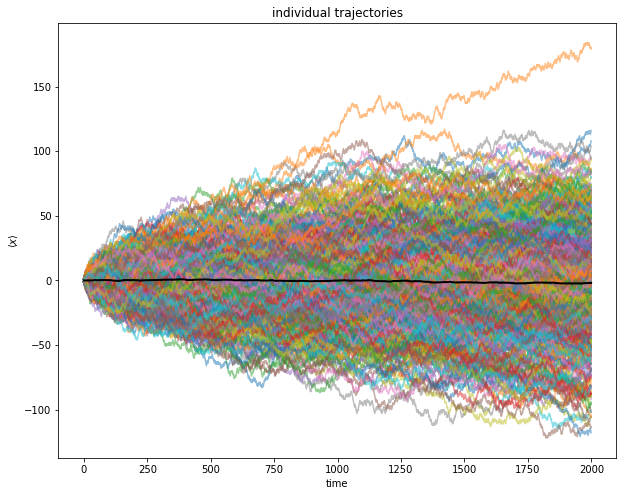

In [30]:
numtrajs = 500
numsteps = 2000
times = range(numsteps)
steps = np.random.random((numtrajs,numsteps)) # gives 2d-array of float random numbers in range [0,1) of size 'numtrajs*numsteps'
steps[steps>0.5] = 1
steps[steps<=0.5] = -1
trajs = np.cumsum(steps,axis=1)
plt.figure(figsize = (10,8))
for traj in trajs:
    plt.plot(times,traj,alpha=0.5)
averages=np.average(trajs,axis=0)
plt.plot(times,averages,color='black',lw=2)
plt.title('individual trajectories')
plt.ylabel(r'$\left<x\right>$')
plt.xlabel('time')

Assuming the quantity is standard deviation and plotting the standard deviation from mean (summing over all the particles) vs number of steps i.e;
$$\sigma_i=\sqrt{\frac{\sum_{n=1}^{500}(X_{cum, i}^n-\bar X_{cum, i})^2}{500}}$$
where, the steps $i \in \{1,2,...,2000\}$, $\sigma_i=$ standard deviation from mean (summing over all the particles) after step $i$ and $X_{cum, i}^n=$ cumulative position of particle $n$ after $i$ steps.

and the mean of (cumulative) position at step $i$ (summing over all the particles) is;
$$\bar X_{cum, i}=\frac{\sum_{n=1}^{500}X_{cum, i}^n}{500}$$
where, the steps $i \in \{1,2,...,2000\}$ 

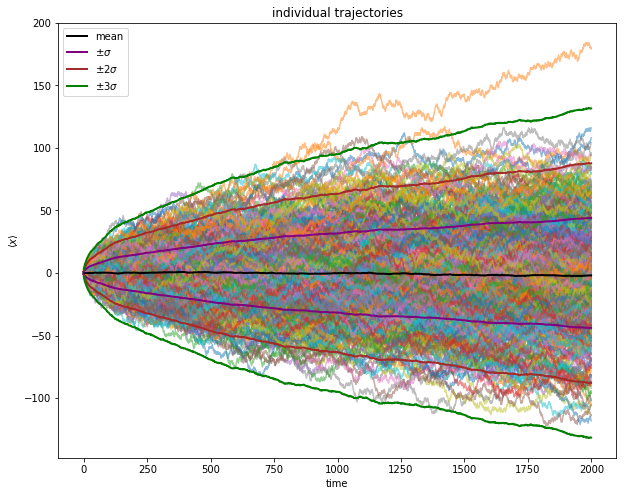

In [31]:
plt.figure(figsize = (10,8))
for traj in trajs:
    plt.plot(times,traj,alpha=0.5)
#print(np.shape(trajs))
sd=np.std(trajs,axis=0)
#print(len(sd))

plt.plot(times,averages,color='black',lw=2,label='mean')
plt.plot(times,sd,color='purple',lw=2,label=r'$\pm \sigma$')
plt.plot(times,-sd,color='purple',lw=2)
plt.plot(times,2*sd,color='brown',lw=2,label=r'$\pm 2\sigma$')
plt.plot(times,-2*sd,color='brown',lw=2)
plt.plot(times,3*sd,color='green',lw=2,label=r'$\pm 3\sigma$')
plt.plot(times,-3*sd,color='green',lw=2)
plt.title('individual trajectories')
plt.ylabel(r'$\left<x\right>$')
plt.xlabel('time')
plt.legend()

The quantity is Root mean square deviation from starting point (like standard deviation but from starting point not mean). RMSD is equal to the standard deviation here, but we don't call it standard deviation, simply because the RMSD depends on the initial position. Even though for random walk, our starting point is always the mean (starting point, for our case is 0 which is equal to the mean which we found out to be 0; for other starting points $x_0$, the mean displacement after $N$ steps, $E(\Delta X_N)=0$ i.e, mean position $\bar x= x_0+E(\Delta X_N)=x_0$), the utility of rmsd goes beyond random walk: SD gives the quantification of spread of data around mean, while RMSD gives the measure of how far the particle got away from the starting point.

Let the starting point be $x=x_0$. Then, distance from the starting point $x_0$ i.e, for 1D motion; $$d(t)=\sqrt{(x(t)-x_0)^2}=x(t)-x_0$$ 

with squared distance, $$d^2(t)=(x(t)-x_0)^2$$

being the important quantity that measures how far the particle got away from the starting point $x=x_0$.

Averaging over many trajectories (500), we get the mean square deviation or distance;
$$MSD(t)=\langle d^2(t)\rangle =\langle (x(t)-x_0)^2\rangle$$

The root mean square deviation is then;
$$RMSD(t)=\sqrt{MSD(t)}=\sqrt{\langle (x(t)-x_0)^2\rangle}$$

Discritizing time $t$ as steps $i$ and plotting the RMSD from origin as the starting point ie, $X=X_0=0$ (summing over all the particles) vs number of steps i.e;
$$\sigma_i=\sqrt{\frac{\sum_{n=1}^{500}(X_{cum, i}^n-0)^2}{500}}$$
where, the steps $i \in \{1,2,...,2000\}$, $\sigma_i=$ RMSD from starting point $X=0$ (summing over all the particles) after step $i$ and $X_{cum, i}^n=$ cumulative position of particle $n$ after $i$ steps.


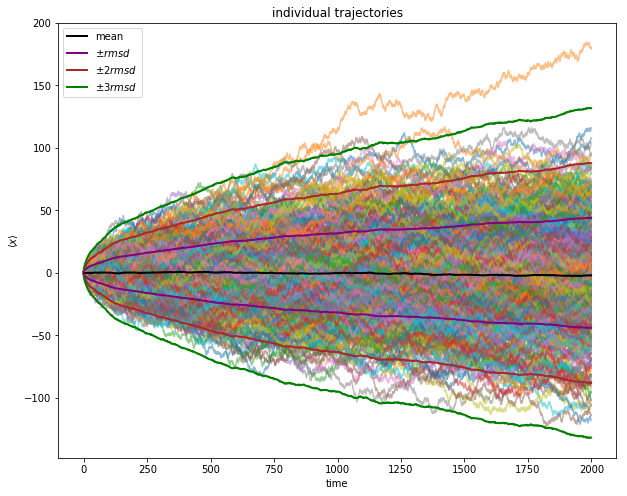

In [32]:
plt.figure(figsize = (10,8))
for traj in trajs:
    plt.plot(times,traj,alpha=0.5)
#print(np.shape(trajs))
msd=np.sum(trajs**2,axis=0)/500
rmsd=np.sqrt(msd)
#print(len(sd))

plt.plot(times,averages,color='black',lw=2,label='mean')
plt.plot(times,rmsd,color='purple',lw=2,label=r'$\pm rmsd$')
plt.plot(times,-rmsd,color='purple',lw=2)
plt.plot(times,2*rmsd,color='brown',lw=2,label=r'$\pm 2rmsd$')
plt.plot(times,-2*rmsd,color='brown',lw=2)
plt.plot(times,3*rmsd,color='green',lw=2,label=r'$\pm 3rmsd$')
plt.plot(times,-3*rmsd,color='green',lw=2)
plt.title('individual trajectories')
plt.ylabel(r'$\left<x\right>$')
plt.xlabel('time')
plt.legend()

### Plotting MSD and linear fit/Regression (min squared error)

[ 0.93170466 53.50319976]


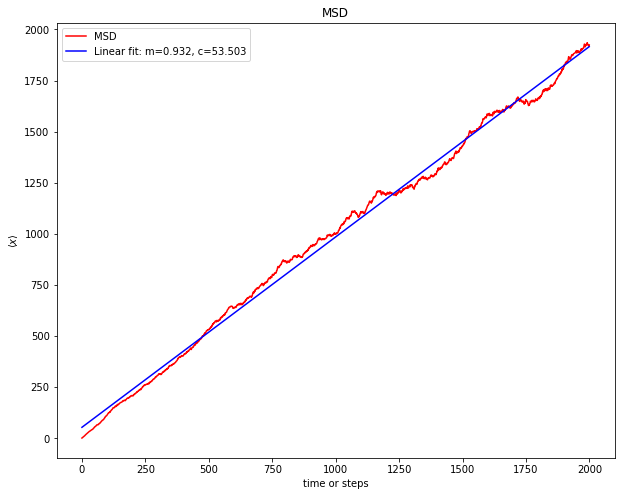

In [50]:
#print(len(msd))
plt.figure(figsize = (10,8))
#for traj in trajs:
    #plt.plot(times,traj,alpha=0.5)
fit=np.polyfit(times,msd,1)   
print(fit)
plt.plot(times,msd,color='red',label='MSD')
plt.plot(times,fit[0]*times+fit[1],color='blue',label='Linear fit: m=0.932, c=53.503')
plt.title('MSD')
plt.ylabel(r'$\left<x\right>$')
plt.xlabel('time or steps')
plt.legend()

### Alternate method using scipy:

1.0543299027745943
-6.1004658231039555


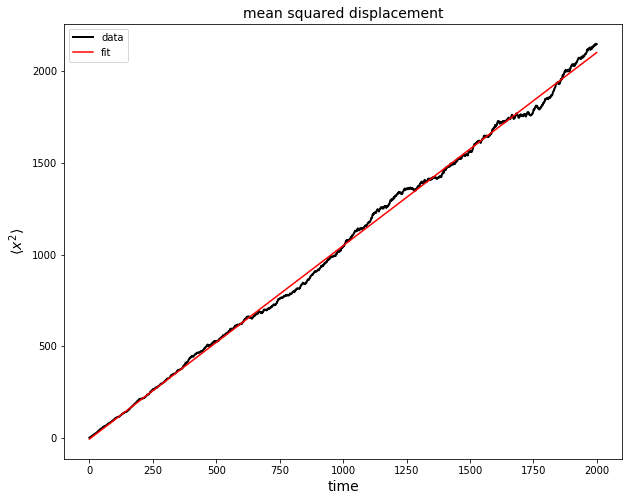

In [80]:
def msd(x, m, c):
    return m*x+c

parameters, covariance = curve_fit(msd, times, np.mean(trajs**2,axis=0) )
fit_m = parameters[0]
fit_c = parameters[1]
print(fit_m)
print(fit_c)

fit_y = msd(times, fit_m, fit_c)

plt.figure(figsize = (10,8))
plt.plot(times,np.mean(trajs**2,axis=0) , linestyle ='-',label='data', lw = 2, color = 'black')
plt.plot(times, fit_y, '-', label='fit', color = 'red')
plt.title('mean squared displacement', fontsize = 14)
plt.ylabel(r'$\left<x^2\right>$', fontsize = 14)
plt.xlabel('time', fontsize = 14)
plt.legend()
plt.show()

### (1D random walk motion) RMSD plots for different step sizes: d= 0.5, 1, 2, 3 and 4

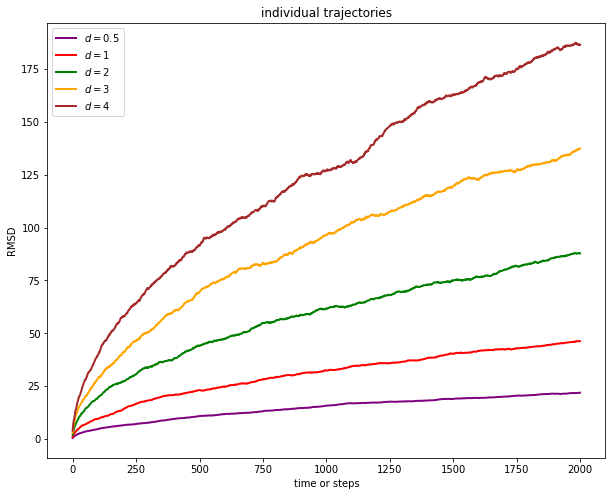

In [72]:
numtrajs = 500
numsteps = 2000
times = range(numsteps)
steps1 = np.random.random((numtrajs,numsteps)) # gives 2d-array of float random numbers in range [0,1) of size 'numtrajs*numsteps'
steps2 = np.random.random((numtrajs,numsteps))
steps3 = np.random.random((numtrajs,numsteps))
steps4 = np.random.random((numtrajs,numsteps))
steps5 = np.random.random((numtrajs,numsteps))

for i in range(0,numtrajs): #Using the below method gave a st. line such that always 0.5 (or -0.5) steps were taken
    for j in range(0,numsteps):
        if steps1[i][j]>0.5:
            steps1[i][j] = 0.5
        else: 
            steps1[i][j] = -0.5
trajs1 = np.cumsum(steps1,axis=1)
msd1=np.sum(trajs1**2,axis=0)/500 # or simply; np.mean(trajs1**2,axis=0)
rmsd1=np.sqrt(msd1)

steps2[steps2>0.5] = 1
steps2[steps2<=0.5] = -1
trajs2 = np.cumsum(steps2,axis=1)
msd2=np.sum(trajs2**2,axis=0)/500
rmsd2=np.sqrt(msd2)

steps3[steps3>0.5] = 2
steps3[steps3<=0.5] = -2
trajs3 = np.cumsum(steps3,axis=1)
msd3=np.sum(trajs3**2,axis=0)/500
rmsd3=np.sqrt(msd3)

steps4[steps4>0.5] = 3
steps4[steps4<=0.5] = -3
trajs4 = np.cumsum(steps4,axis=1)
msd4=np.sum(trajs4**2,axis=0)/500
rmsd4=np.sqrt(msd4)

steps5[steps5>0.5] = 4
steps5[steps5<=0.5] = -4
trajs5 = np.cumsum(steps5,axis=1)
msd5=np.sum(trajs5**2,axis=0)/500
rmsd5=np.sqrt(msd5)
#print(len(sd))
plt.figure(figsize = (10,8))
#plt.plot(times,averages,color='black',lw=2,label='mean')
plt.plot(times,rmsd1,color='purple',lw=2,label=r'$d=0.5$')
plt.plot(times,rmsd2,color='red',lw=2,label=r'$d=1$')
plt.plot(times,rmsd3,color='green',lw=2,label=r'$d=2$')
plt.plot(times,rmsd4,color='orange',lw=2,label=r'$d=3$')
plt.plot(times,rmsd5,color='brown',lw=2,label=r'$d=4$')

plt.title('RMSD')
plt.ylabel(r'RMSD')
plt.xlabel('time or steps')
plt.legend()
plt.show()

### Smoothening of the plots by curve fitting

The fitting function for RMSD is of the form;
$$y=m\sqrt{x}+c$$
where; $y= RMSD(i)$ and step $x=i$

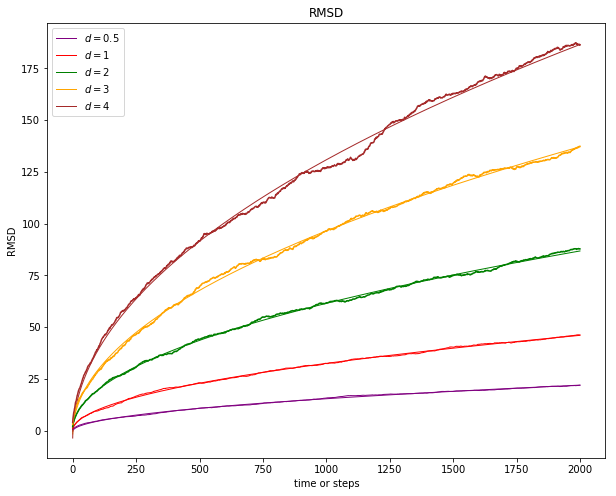

In [84]:
def msd(x, m, c):
    return m*np.sqrt(x)+c

parameters1, covariance1 = curve_fit(msd, times, rmsd1)
fit_m1 = parameters1[0]
fit_c1 = parameters1[1]
#print(fit_m1)
#print(fit_c1)

fit_y1 = msd(times, fit_m1, fit_c1)

parameters2, covariance2 = curve_fit(msd, times, rmsd2)
fit_m2 = parameters2[0]
fit_c2 = parameters2[1]
#print(fit_m2)
#print(fit_c2)

fit_y2 = msd(times, fit_m2, fit_c2)


parameters3, covariance3 = curve_fit(msd, times, rmsd3)
fit_m3 = parameters3[0]
fit_c3 = parameters3[1]
#print(fit_m3)
#print(fit_c3)

fit_y3 = msd(times, fit_m3, fit_c3)


parameters4, covariance4 = curve_fit(msd, times, rmsd4)
fit_m4 = parameters4[0]
fit_c4 = parameters4[1]
#print(fit_m4)
#print(fit_c4)

fit_y4 = msd(times, fit_m4, fit_c4)


parameters5, covariance5 = curve_fit(msd, times, rmsd5)
fit_m5 = parameters5[0]
fit_c5 = parameters5[1]
#print(fit_m5)
#print(fit_c5)

fit_y5 = msd(times, fit_m5, fit_c5)



plt.figure(figsize = (10,8))
#plt.plot(times,averages,color='black',lw=2,label='mean')
plt.plot(times,fit_y1,color='purple',lw=1,label=r'$d=0.5$')
plt.plot(times,fit_y2,color='red',lw=1,label=r'$d=1$')
plt.plot(times,fit_y3,color='green',lw=1,label=r'$d=2$')
plt.plot(times,fit_y4,color='orange',lw=1,label=r'$d=3$')
plt.plot(times,fit_y5,color='brown',lw=1,label=r'$d=4$')

plt.plot(times,rmsd1,color='purple',lw=1)
plt.plot(times,rmsd2,color='red',lw=1)
plt.plot(times,rmsd3,color='green')
plt.plot(times,rmsd4,color='orange')
plt.plot(times,rmsd5,color='brown')


plt.title('RMSD')
plt.ylabel(r'RMSD')
plt.xlabel('time or steps')
plt.legend()
plt.show()


### Also, another coding problem - 
There is a utility called ipywidgets. Please check its documentation to create an animation for this motion. So, what we ideally need is - two sliders: numtrajs, and numsteps. You need to create an animation in your jupyter notebook such that we can vary numtrajs and numsteps.

In [34]:

def plot_func(numtrajs, numsteps):
    times = range(numsteps)
    steps = np.random.random((numtrajs,numsteps)) 
    steps[steps>0.5] = 1
    steps[steps<=0.5] = -1
    trajs = np.cumsum(steps,axis=1)
    plt.figure(figsize = (10,8))
    for traj in trajs:
        plt.plot(times,traj,alpha=0.5)
    averages=np.average(trajs,axis=0)
    plt.plot(times,averages,color='black',lw=2)
    plt.title('individual trajectories')
    plt.ylabel(r'$\left<x\right>$')
    plt.xlabel('time')
    #plt.show()

interact(plot_func, numtrajs = widgets.IntSlider(value=500, min=1, max=500, step=1), numsteps = widgets.IntSlider(value=2000, 
                                                                                                                 min=1, 
                                                                                                                 max=2000, 
                                                                                                                 step=1))

A Jupyter Widget

<function __main__.plot_func>